# Data Loading

### Loading Libraries

In [71]:
import xgboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

### Loading dataset

In [72]:
sub_data = pd.read_csv(
    "/home/nailsonseat/Desktop/Datasets/MLP_project_datasets/test_data_v2.csv")
train_data = pd.read_csv(
    "/home/nailsonseat/Desktop/Datasets/MLP_project_datasets/train_data_v2.csv")

### Extracting features and target variable

In [73]:
X=train_data.drop('Made_Purchase',axis=1)
y=pd.DataFrame(train_data['Made_Purchase'])

# Data Exploration

### Description

The first six columns represent the different pages in the e-commerce website visited by a user from other sites.

* HomePage: Number of times visited this page

*   HomePage_Duration: Total number of duration spent on this page.

*   LandingPage: Number of times visited this page

*   LandingPage_Duration: Total number of duration spent on this page.

*   ProductDesriptionPage Number of times visited this page

*   ProductDescriptionPage_Duration: Total number of duration spent on this page.

*   GoogleMetric-Bounce Rate: Whenever a user comes to any one web-page of the website and he/she does not go to any other page and exits from the website from the same page, then this activity done by the user is called Bounce. And the percentage of the total number of times the user visiting our website and bounce it, is called Bounce Rate

*   GoogleMetric-Exit Rate: The bounce rate is calculated based on the user exiting a website after visiting one page. But some users exit from the second, third, fourth, or any other page of our website, then those visitors’ data help determine the exit rate. The percentage of the total number of times the user to our website who do not exit from the first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.

*   GoogleMetric-Page Value: Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.

*   SeasonalPurchase: It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.

*   Month_ SeasonalPurchase: Month of the special day considered for seasonal purchase.

The other attributes like, OS, Search Engine, Zone, Type of Traffic, Customer Type, Gender, Cookies Setting, Education, Marital Status and Weekend Purchase are self-explanatory variables

In [74]:
X.sample(10).transpose()

,9273,10698,14173,7665,12996,6321,11671,5100,5601,7137
HomePage,0.0,4.0,2.0,0.0,1.0,2.0,2.0,2.0,4.0,0.0
HomePage_Duration,0.0,22.916667,33.0,0.0,33.5,67.75,25.0,6.0,106.5,0.0
LandingPage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LandingPage_Duration,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ProductDescriptionPage,2.0,22.0,28.0,5.0,33.0,11.0,6.0,37.0,12.0,5.0
ProductDescriptionPage_Duration,0.0,221.25,898.5,124.0,880.633333,417.989286,65.0,501.766667,806.25,184.0
GoogleMetric:Bounce Rates,0.2,0.014815,0.0,0.0,0.0,0.016667,0.0,0.010256,0.0125,0.0
GoogleMetric:Exit Rates,0.2,0.035185,0.013333,0.06,0.034118,0.043148,0.025,0.020513,0.029167,0.04
GoogleMetric:Page Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SeasonalPurchase,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


### Shapes

In [76]:
print(X.shape)
print(y.shape)

(14731, 21)
(14731, 1)


### Unique values in features

In [77]:
X.nunique()

HomePage                             27
HomePage_Duration                  2844
LandingPage                          17
LandingPage_Duration               1084
ProductDescriptionPage              294
ProductDescriptionPage_Duration    7933
GoogleMetric:Bounce Rates          1628
GoogleMetric:Exit Rates            4051
GoogleMetric:Page Values           2120
SeasonalPurchase                      6
Month_SeasonalPurchase               10
OS                                    8
SearchEngine                         13
Zone                                  9
Type of Traffic                      20
CustomerType                          3
Gender                                3
Cookies Setting                       3
Education                             4
Marital Status                        3
WeekendPurchase                       2
dtype: int64

### Range of data

In [78]:
X.describe().loc[['min','max']].transpose()

,min,max
HomePage,0.0,27.000000
HomePage_Duration,0.0,3398.750000
LandingPage,0.0,24.000000
LandingPage_Duration,0.0,2549.375000
ProductDescriptionPage,0.0,705.000000
ProductDescriptionPage_Duration,0.0,63973.522230
GoogleMetric:Bounce Rates,0.0,0.200000
GoogleMetric:Exit Rates,0.0,0.200000
GoogleMetric:Page Values,0.0,361.763742
SeasonalPurchase,0.0,1.000000


### Data types of features

In [79]:
X.dtypes

HomePage                           float64
HomePage_Duration                  float64
LandingPage                        float64
LandingPage_Duration               float64
ProductDescriptionPage             float64
ProductDescriptionPage_Duration    float64
GoogleMetric:Bounce Rates          float64
GoogleMetric:Exit Rates            float64
GoogleMetric:Page Values           float64
SeasonalPurchase                   float64
Month_SeasonalPurchase              object
OS                                 float64
SearchEngine                       float64
Zone                               float64
Type of Traffic                    float64
CustomerType                        object
Gender                              object
Cookies Setting                     object
Education                           object
Marital Status                      object
WeekendPurchase                    float64
dtype: object

In [80]:
X[['Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education','Marital Status']].sample(10)

,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status
9170,June,Returning_Visitor,Female,ALL,Not Specified,Married
2035,May,Returning_Visitor,Male,Required,Diploma,Other
10956,Nov,Returning_Visitor,Female,Deny,Diploma,Married
10820,Feb,Returning_Visitor,Male,Required,Diploma,Single
1355,Mar,Returning_Visitor,Male,ALL,Others,Single
7811,Dec,Returning_Visitor,Female,Deny,Others,Married
8545,Nov,Returning_Visitor,Not Specified,ALL,Diploma,Other
2306,May,Returning_Visitor,Not Specified,Required,Not Specified,Married
6841,Dec,Returning_Visitor,Not Specified,ALL,Diploma,Married
3408,May,Returning_Visitor,Not Specified,ALL,Graduate,Single


### Missing values

In [81]:
X.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
dtype: int64

In [82]:
for i in X[['Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education','Marital Status']].columns:
    print(X[i].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec' nan]
['Returning_Visitor' 'New_Visitor' 'Other' nan]
['Not Specified' 'Female' 'Male' nan]
['Deny' 'ALL' 'Required' nan]
['Not Specified' 'Others' 'Diploma' 'Graduate' nan]
['Other' 'Married' 'Single' nan]


In [83]:
y.isna().sum()

Made_Purchase    0
dtype: int64

### Outliers

array([[<AxesSubplot: title={'center': 'HomePage'}>,
        <AxesSubplot: title={'center': 'HomePage_Duration'}>,
        <AxesSubplot: title={'center': 'LandingPage'}>,
        <AxesSubplot: title={'center': 'LandingPage_Duration'}>],
       [<AxesSubplot: title={'center': 'ProductDescriptionPage'}>,
        <AxesSubplot: title={'center': 'ProductDescriptionPage_Duration'}>,
        <AxesSubplot: title={'center': 'GoogleMetric:Bounce Rates'}>,
        <AxesSubplot: title={'center': 'GoogleMetric:Exit Rates'}>],
       [<AxesSubplot: title={'center': 'GoogleMetric:Page Values'}>,
        <AxesSubplot: title={'center': 'SeasonalPurchase'}>,
        <AxesSubplot: title={'center': 'OS'}>,
        <AxesSubplot: title={'center': 'SearchEngine'}>],
       [<AxesSubplot: title={'center': 'Zone'}>,
        <AxesSubplot: title={'center': 'Type of Traffic'}>,
        <AxesSubplot: title={'center': 'WeekendPurchase'}>,
        <AxesSubplot: >]], dtype=object)

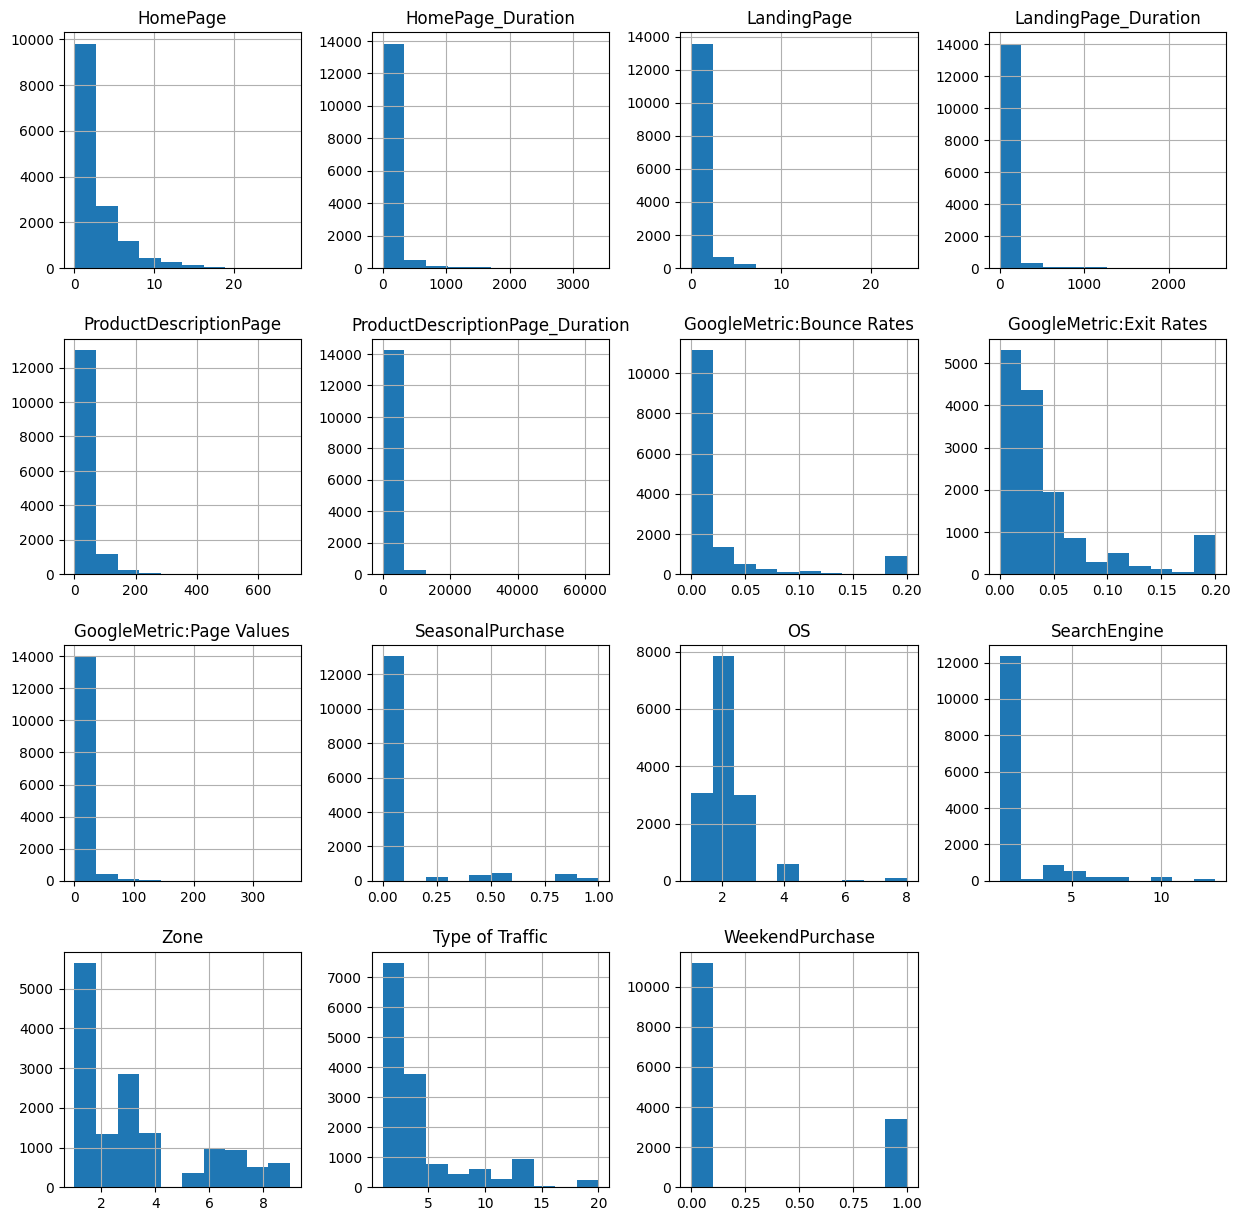

In [84]:
X.hist(figsize=(15,15))

### Correlations

<AxesSubplot: >

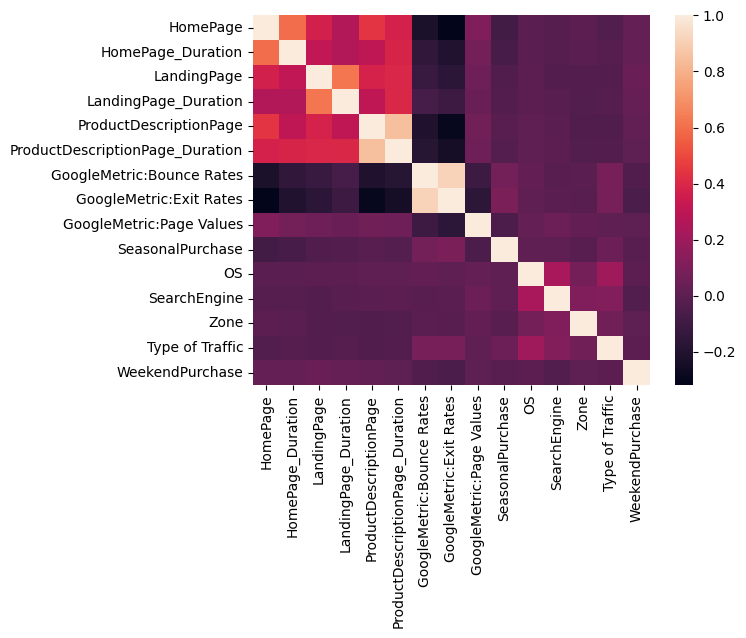

In [85]:
sns.heatmap(X.drop(['Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education','Marital Status'],axis=1).corr())

### Target variable(s)

In [86]:
y.nunique()

Made_Purchase    2
dtype: int64

In [87]:
y['Made_Purchase'].unique()

array([False,  True])

In [88]:
y.describe()

,Made_Purchase
count,14731
unique,2
top,False
freq,9065


### Insights

In [97]:
categorical_features=[
    'Month_SeasonalPurchase',
    'CustomerType','Gender',
    'Cookies Setting','Education',
    'Marital Status','WeekendPurchase',
    'Zone',
    'Type of Traffic',
    'SearchEngine',
    'OS']
numerical_features=[
    'HomePage',
    'HomePage_Duration',
    'LandingPage',
    'LandingPage_Duration',
    'ProductDescriptionPage',
    'ProductDescriptionPage_Duration',
    'GoogleMetric:Bounce Rates',
    'GoogleMetric:Exit Rates',
    'GoogleMetric:Page Values',
    'SeasonalPurchase']

# Data pre-processing

### Data Cleaning

In [90]:
combined_imputer=ColumnTransformer(transformers=[
    ('numerical_imputer',KNNImputer(n_neighbors=10),numerical_features),
    ('catagorical_imputer',SimpleImputer(strategy='most_frequent'),categorical_features)
])

In [91]:
X_imputed=combined_imputer.fit_transform(X)

In [98]:
X_imputed=pd.DataFrame(data=X_imputed,columns=numerical_features+categorical_features)

In [99]:
X_imputed.isna().sum()

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
SeasonalPurchase                   0
Month_SeasonalPurchase             0
CustomerType                       0
Gender                             0
Cookies Setting                    0
Education                          0
Marital Status                     0
WeekendPurchase                    0
Zone                               0
Type of Traffic                    0
SearchEngine                       0
OS                                 0
dtype: int64

### Data Scaling